In [1]:
import pandas as pd
import numpy as np

_76ers = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_76ers_FTs.csv')
Bucks = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Bucks_FTs.csv')
Bulls = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Bulls_FTs.csv')
Cavs = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Cavaliers_FTs.csv')
Celtics = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Celtics_FTs.csv')
Clippers = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Clippers_FTs.csv')
Grizzlies = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Grizzlies_FTs.csv')
Hawks = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Hawks_FTs.csv')
Heat = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Heat_FTs.csv')
Hornets = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Hornets_FTs.csv')
Jazz = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Jazz_FTs.csv')
Kings = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Kings_FTs.csv')
Knicks = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Knicks_FTs.csv')
Lakers = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Lakers_FTs.csv')
Magic = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Magic_FTs.csv')
Mavericks = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Mavericks_FTs.csv')
Nets = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Nets_FTs.csv')
Nuggets = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Nuggets_FTs.csv')
Pacers = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Pacers_FTs.csv')
Pelicans = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Pelicans_FTs.csv')
Pistons = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Pistons_FTs.csv')
Raptors = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Raptors_FTs.csv')
Rockets = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Rockets_FTs.csv')
Spurs = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Spurs_FTs.csv')
Suns = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Suns_FTs.csv')
Thunder = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Thunder_FTs.csv')
Timberwolves = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Timberwolves_FTs.csv')
TrailBlazers = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_TrailBlazers_FTs.csv')
Warriors = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Warriors_FTs.csv')
Wizards = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Wizards_FTs.csv')

League = [_76ers,Bucks,Bulls,Cavs,Celtics,Clippers,Grizzlies,Hawks,Heat,Hornets,Jazz,Kings,Knicks,Lakers,Magic,Mavericks,
          Nets,Nuggets,Pacers,Pelicans,Pistons,Raptors,Rockets,Spurs,Suns,Thunder,Timberwolves,TrailBlazers,Warriors,Wizards]
df = pd.concat(League)

In [2]:
#drop 7 rows that doesn't contain actual stats
df = df[df['Tm']!='Tm']

#create new feature 'score', describes how many points team is winning or losing by the time of free-throw
df['UpDownTie']=df['Score (Before)'].str.split(' ', expand=True)[1]
df['Score']=df['Score (Before)'].str.split(' ', expand=True)[2]
df['Score']=np.where(df['UpDownTie']=='tied','0',df['Score'])
df['Score']=df['Score'].astype(float)
df['Score']=np.where(df['UpDownTie']=='down',-df['Score'],df['Score'])

df['Player']=df['Description'].apply(lambda x: x[:x.find('makes')] if x.find('makes')!=-1 
                                     else (x[:x.find('misses')] if x.find('misses')!=-1 else None))

df['Success']=df['Description'].apply(lambda x: 1 if 'makes' in x else (0 if 'misses' in x else None))

df['Time_new']=df['Time'].apply(lambda x: x[:2])
df['Time_new']=df['Time_new'].astype(int)
clutch = (df['Qtr']=='4th') & (df['Time_new'] <= 5) | df['Qtr'].str.contains('OT')
df['Clutch']=clutch

df = df.drop(['UpDownTie','Time_new'],axis=1)

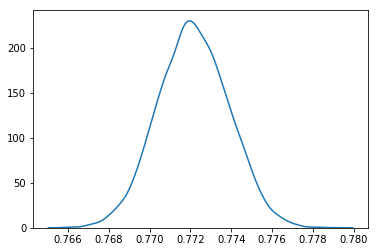

In [18]:
from scipy import stats
import seaborn as sns
%matplotlib inline
alpha0=df[df['Success']==1].shape[0]
beta0=df[df['Success']==0].shape[0]
prior=stats.beta.rvs(alpha0,beta0,size=10000)
sns.kdeplot(prior)

In [19]:
df['Success'].value_counts()

1    46802
0    13811
Name: Success, dtype: int64

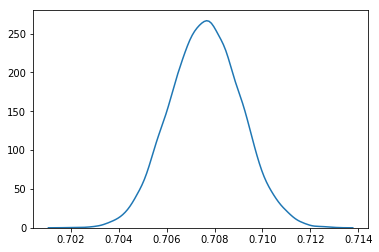

In [20]:
alpha_clutch=df[df['Success']==1 & df['Clutch']].shape[0]
beta_clutch=df[df['Success']==0 & df['Clutch']].shape[0]
FTR_clutch=stats.beta.rvs(alpha0+alpha_clutch,beta0+beta_clutch,size=10000)
sns.kdeplot(FTR_clutch)

In [21]:
alpha_clutch

20048

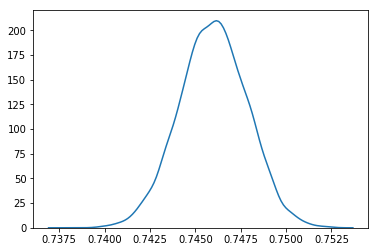

In [17]:
alpha_non_clutch=df[df['Success']==1 & df['Clutch']-1].shape[0]
beta_non_clutch=df[df['Success']==0 & df['Clutch']-1].shape[0]
FTR_non_clutch=stats.beta.rvs(1+alpha_non_clutch,1+beta_non_clutch,size=10000)
sns.kdeplot(FTR_non_clutch)

In [6]:
df["Total_by_Player"]=df.groupby('Player')['Player'].transform('count')
df["Success_by_Player"] = df.groupby('Player')["Success"].transform('sum')
df['Failure_by_Player']=df['Total_by_Player']-df['Success_by_Player']
df=df.drop('Total_by_Player',axis=1)

In [7]:
df['FTR_by_Player']=(alpha0+df['Success_by_Player'])/(alpha0+df['Success_by_Player']+beta0+df['Failure_by_Player'])

In [8]:
df.describe()

,Rk,Score,Success,Success_by_Player,Failure_by_Player,FTR_by_Player
count,60613.000000,60613.000000,60613.000000,60613.000000,60613.000000,60613.000000
mean,1023.736245,-0.308003,0.772145,239.349364,62.568492,0.772246
std,604.813465,11.136181,0.419452,191.148014,49.524625,0.000593
min,1.000000,-52.000000,0.000000,0.000000,0.000000,0.769781
25%,506.000000,-7.000000,1.000000,98.000000,30.000000,0.772038
50%,1011.000000,0.000000,1.000000,173.000000,50.000000,0.772188
75%,1516.000000,6.000000,1.000000,347.000000,74.000000,0.772492
max,2461.000000,49.000000,1.000000,847.000000,254.000000,0.773679


In [9]:
# import re
# reg1 = re.compile(r"\sup\s")
# reg2 = re.compile(r"\sdown\s")
# reg3 = re.compile(r"\sd+\s")

In [10]:
# df['Player']=df['Description'].str.split(' ', expand=True)[0]+df['Description'].str.split(' ', expand=True)[1]
# df['MakeMiss']=df['Description'].str.split(' ', expand=True)[2]

In [11]:
# df[df['Description'].str.contains("makes")]['Instance']=1
# df[df['Description'].str.contains("misses")]['Instance']=0

In [12]:
df.tail(50)

,Rk,Date,Tm,Unnamed: 3,Opp,Qtr,Time,Score (Before),Description,Score (After),Score,Player,Success,Clutch,Success_by_Player,Failure_by_Player,FTR_by_Player
2082,2083,5/12/17,WAS,NaN,BOS,1st,05:54.0,WAS up 3 (11-8),J. Wall misses free throw 1 of 2,WAS up 3 (11-8),3.0,J. Wall,0,False,500,120,0.772492
2083,2084,5/12/17,WAS,NaN,BOS,1st,05:54.0,WAS up 3 (11-8),J. Wall makes free throw 2 of 2,WAS up 4 (12-8),3.0,J. Wall,1,False,500,120,0.772492
2084,2085,5/12/17,WAS,NaN,BOS,1st,00:03.0,WAS up 5 (22-17),I. Mahinmi misses free throw 1 of 2,WAS up 5 (22-17),5.0,I. Mahinmi,0,False,47,39,0.771825
2085,2086,5/12/17,WAS,NaN,BOS,1st,00:03.0,WAS up 5 (22-17),I. Mahinmi misses free throw 2 of 2,WAS up 5 (22-17),5.0,I. Mahinmi,0,False,47,39,0.771825
2086,2087,5/12/17,WAS,NaN,BOS,2nd,11:40.0,WAS up 5 (22-17),I. Mahinmi misses free throw 1 of 2,WAS up 5 (22-17),5.0,I. Mahinmi,0,False,47,39,0.771825
2087,2088,5/12/17,WAS,NaN,BOS,2nd,11:40.0,WAS up 5 (22-17),I. Mahinmi misses free throw 2 of 2,WAS up 5 (22-17),5.0,I. Mahinmi,0,False,47,39,0.771825
2088,2089,5/12/17,WAS,NaN,BOS,2nd,05:32.0,WAS up 4 (32-28),B. Beal makes free throw 1 of 2,WAS up 5 (33-28),4.0,B. Beal,1,False,332,71,0.772486
2089,2090,5/12/17,WAS,NaN,BOS,2nd,05:32.0,WAS up 5 (33-28),B. Beal makes free throw 2 of 2,WAS up 6 (34-28),5.0,B. Beal,1,False,332,71,0.772486
2090,2091,5/12/17,WAS,NaN,BOS,2nd,04:47.0,WAS up 6 (36-30),M. Morris makes free throw 1 of 1,WAS up 7 (37-30),6.0,M. Morris,1,False,350,81,0.772426
2091,2092,5/12/17,WAS,NaN,BOS,2nd,03:46.0,WAS up 9 (39-30),J. Smith makes free throw 1 of 2,WAS up 10 (40-30),9.0,J. Smith,1,False,60,31,0.771975
